In [3]:
# This script represents my effort to teach myself a bit of data science in Python. 
# Here is a list of the sources I'm using. 
    # 1. Books proper:
        # 1a. Grus, Data Science From Scratch
        # 1b. McKinney, Python for Data Analysis, 2nd ed. (I found this more helpful than Grus,
        # who doesn't even show some very basic libraries--seems more like a course in first principles).
        # 1c. Sheppard, Introduction to Python for Econometrics, Statistics and Numerical Analysis: Fourth Edition
            # (found using Sullivan's website). 
        # 1d. VanderPlas, Python Data Science Handbook. I found this one late while looking for the way to make
            # a pivot table. It may be the best one so far, though. It looks to have a lot more real-world
            # data strewn throughout, and used early on, than the others, which is how I teach, but not how
            # most books are written. This seems to be the one to pick up. 
    # 2. Websites: 
        # 2a. Daniel Sullivan, Stata to Python Equivalents (found via Google): https://archive.ph/EVt9d
        # 2b. Learn X in Y Minutes (author unknown; recommended by Sullivan, though I noticed that the line
        # about "executable pseudo-code" is quoted in Grus or McKinney): https://archive.ph/sZeGv
    # 3. Youtube. 
        # 3a. This playlist from "DataDaft" (Greg Hamel)
        # https://www.youtube.com/watch?v=2_6O39UdFi0&list=PLiC1doDIe9rCYWmH9wIEYEXXaJ4KAi3jc&ab_channel=DataDaft

In [1]:
# First, let's import the pandas tool. 
import pandas as pd # We name this in the standard way: "pd" will be a prefix of many functions later. 
from pandas import Series, DataFrame # This step is useful, too. 
import numpy as np

In [2]:
# Let's import some data quickly. 
df = pd.read_stata('~/desktop/python/data/cps2019modified.dta') 
    # I had to modify these data because many value-labels in Stata data-sets have repeats in the value-label
    # which confuses Python; see some discussion of that here: https://archive.ph/nfqlL. 

In [3]:
# Let's list just the first few observations for some exploratory data analysis. 
snippet = df.head(50)
(snippet)

,year,month,minsamp,hhid,hhid2,age,female,wbhaom,forborn,citizen,...,rural,ind12,ind14,occ11,occ12,manag03,uhourse,wage1,wage2,wage4
0,2019,8,8,5.061104e+08,8011,54,1,White,0,1,...,0,NaN,Elementary and secondary schools 6111,NaN,Elementary and middle school teachers 25-2020,0.0,40.0,NaN,9.807500,9.807500
1,2019,8,8,5.061104e+08,8011,54,0,White,0,1,...,0,NaN,Construction 23,NaN,"Brickmasons, blockmasons, and stonemasons 47-2020",0.0,40.0,NaN,20.000000,20.000000
2,2019,9,8,5.096106e+08,8011,32,0,Hispanic,1,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,9,8,5.096106e+08,8011,63,0,Hispanic,1,0,...,0,NaN,Investigation and security services 5616,NaN,"Other installation, maintenance, and repair wo...",0.0,40.0,24.670000,NaN,27.445000
4,2019,9,8,5.096106e+08,8011,64,1,Hispanic,1,1,...,0,NaN,Other direct selling establishments 45439,NaN,"Door-to-door sales, news & street vendors, & r...",0.0,40.0,NaN,NaN,NaN
5,2019,7,8,4.795111e+09,8111,56,1,White,1,0,...,0,NaN,Elementary and secondary schools 6111,NaN,Elementary and middle school teachers 25-2020,0.0,0.0,NaN,NaN,NaN
6,2019,3,4,4.795111e+09,9011,68,0,Black,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019,3,4,4.795111e+09,9011,64,1,Black,0,1,...,0,NaN,Motor vehicles & motor vehicle equipment manuf...,NaN,Miscellaneous assemblers and fabricators 51-2090,0.0,40.0,14.000000,NaN,14.000000
8,2019,7,8,4.795111e+09,8111,54,0,Native American,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019,7,8,4.795111e+09,8111,85,1,White,0,1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# We can ask for information about the whole data-set. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291390 entries, 0 to 291389
Data columns (total 38 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   year      291390 non-null  int16   
 1   month     291390 non-null  int8    
 2   minsamp   291390 non-null  int8    
 3   hhid      291390 non-null  float64 
 4   hhid2     291390 non-null  int16   
 5   age       291390 non-null  int8    
 6   female    291390 non-null  int8    
 7   wbhaom    291390 non-null  category
 8   forborn   291390 non-null  int8    
 9   citizen   291390 non-null  int8    
 10  vet       285558 non-null  float64 
 11  married   291390 non-null  int8    
 12  marstat   291390 non-null  category
 13  ownchild  175452 non-null  float64 
 14  empl      290217 non-null  float64 
 15  unem      290217 non-null  float64 
 16  nilf      290217 non-null  float64 
 17  selfemp   186344 non-null  float64 
 18  cow1      186344 non-null  category
 19  cow2      8784 non-null

In [8]:
df.shape[0] # This returns our n

291390

In [9]:
df['wage1'].describe() # This gives information about a specific variable

count    89883.000000
mean        18.648195
std         10.428659
min          0.000000
25%         12.000000
50%         15.750000
75%         22.000000
max         99.989998
Name: wage1, dtype: float64

In [10]:
df['wbhaom'].value_counts() # This is basically tabulate

White              200258
Hispanic            38771
Black               28557
Asian               16728
Mixed                4032
Native American      3044
Name: wbhaom, dtype: int64

In [11]:
pd.crosstab(df['wbhaom'], df['union']) # We can make a two-way table 
pd.crosstab(df.wbhaom,df.union, normalize='index') # and this adds percentages (Nb that this is not found in Sullivan;
    # see here: https://archive.ph/c2eTT)

union,0.0,1.0
wbhaom,,
White,0.884114,0.115886
Black,0.877961,0.122039
Hispanic,0.899897,0.100103
Asian,0.878147,0.121853
Native American,0.898342,0.101658
Mixed,0.878760,0.121240


In [12]:
# We can also take conditional means
df.groupby(['wbhaom', 'union'])['wage1'].aggregate('mean').unstack()
    # This is slightly unclear in Sullivan as he does not include syntax for placement of the third variable, 
    # and he does not give the functions. After ascertaining that many people call this a "pivot table", I 
    # found the correct code in this excerpt from Jake VanderPlas' book: https://archive.ph/EmRQZ. 

union,0.0,1.0
wbhaom,,
White,18.765995,25.347050
Black,15.691711,20.263372
Hispanic,16.048756,21.932507
Asian,19.678295,25.869364
Native American,16.858601,21.514286
Mixed,16.431034,23.742165


In [13]:
import numpy as np

In [14]:
np?

In [15]:
np.array?

In [16]:
np.arange?

In [17]:
df["high_wages"] = (df["wage4"]>40) # here we make a new dummy variable
snippet = df.head(50) # update the list of the first 50 obs. 
snippet # and check work 
df["high_wages"].describe() 
print(np.dtype(df["high_wages"])) # this is a Bool; let's make it a true dummy
df["high_wages"] = df["high_wages"]*1
print(np.dtype(df["high_wages"])) # Now this is an integer
wages_lab = { # we can also make a value label and apply it; first, we make the key...
    0: "low wages",
    1: "high wages"
}
df['high_wages'] = df.apply(lambda x: wages_lab.get(x['high_wages']), axis=1)
    # Then we apply it (see here: https://archive.ph/Lq0Xe.) This applies the anonymous function (or lambda)
    # "x", which follows the get() syntax, described here https://archive.ph//OmZfu, which obeys the logic 
    # "dict.get(key)". According to the help for df.apply -- df.apply? -- "objects passed to the function are 
    # Series objects whose index is either the DataFrame's index (``axis=0``) or the DataFrame's columns
    # (``axis=1``). 
snippet = df.head(50)
snippet # and we can see the value label applied nowl

bool
int64


,year,month,minsamp,hhid,hhid2,age,female,wbhaom,forborn,citizen,...,ind12,ind14,occ11,occ12,manag03,uhourse,wage1,wage2,wage4,high_wages
0,2019,8,8,5.061104e+08,8011,54,1,White,0,1,...,NaN,Elementary and secondary schools 6111,NaN,Elementary and middle school teachers 25-2020,0.0,40.0,NaN,9.807500,9.807500,low wages
1,2019,8,8,5.061104e+08,8011,54,0,White,0,1,...,NaN,Construction 23,NaN,"Brickmasons, blockmasons, and stonemasons 47-2020",0.0,40.0,NaN,20.000000,20.000000,low wages
2,2019,9,8,5.096106e+08,8011,32,0,Hispanic,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low wages
3,2019,9,8,5.096106e+08,8011,63,0,Hispanic,1,0,...,NaN,Investigation and security services 5616,NaN,"Other installation, maintenance, and repair wo...",0.0,40.0,24.670000,NaN,27.445000,low wages
4,2019,9,8,5.096106e+08,8011,64,1,Hispanic,1,1,...,NaN,Other direct selling establishments 45439,NaN,"Door-to-door sales, news & street vendors, & r...",0.0,40.0,NaN,NaN,NaN,low wages
5,2019,7,8,4.795111e+09,8111,56,1,White,1,0,...,NaN,Elementary and secondary schools 6111,NaN,Elementary and middle school teachers 25-2020,0.0,0.0,NaN,NaN,NaN,low wages
6,2019,3,4,4.795111e+09,9011,68,0,Black,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low wages
7,2019,3,4,4.795111e+09,9011,64,1,Black,0,1,...,NaN,Motor vehicles & motor vehicle equipment manuf...,NaN,Miscellaneous assemblers and fabricators 51-2090,0.0,40.0,14.000000,NaN,14.000000,low wages
8,2019,7,8,4.795111e+09,8111,54,0,Native American,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low wages
9,2019,7,8,4.795111e+09,8111,85,1,White,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low wages


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

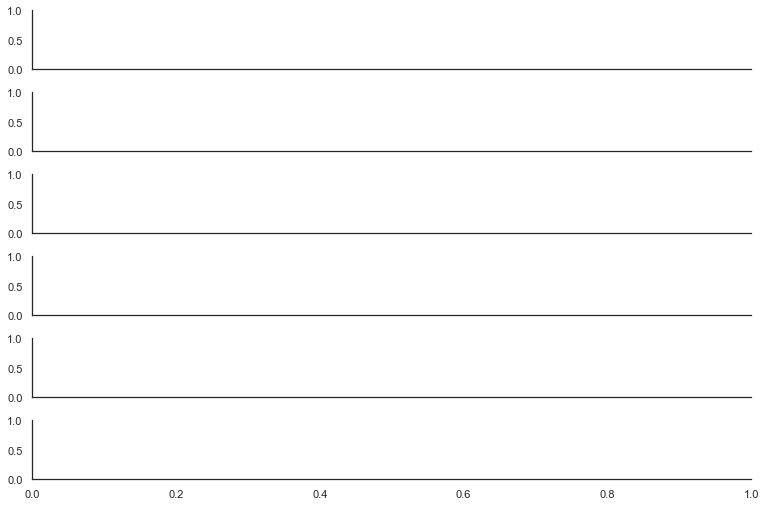

In [44]:
# Let's make a ridgeplot! Based on this: 
# https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af

sns.set_theme(style="white") # This sets the theme
g = sns.FacetGrid(df, row="wbhaom", aspect = 9, height = 1.2)
    # This creates a "Facet Grid", i.e. just produces an emptry grid for the number of values of wbhaom
    # https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

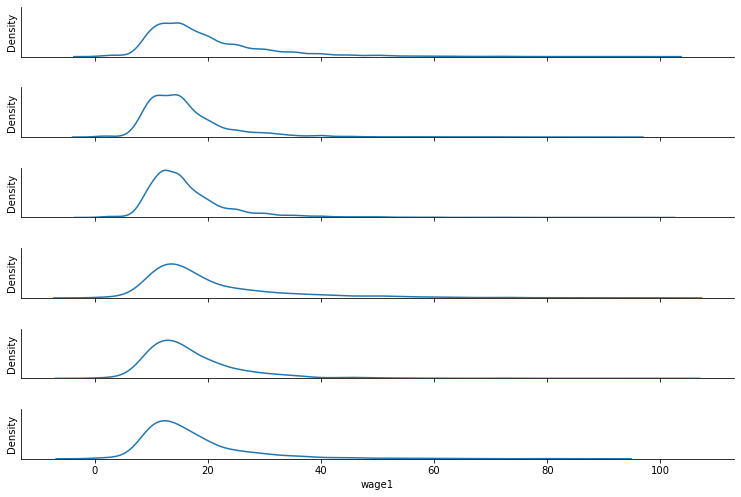

In [19]:
figure = sns.FacetGrid(df, row="wbhaom", aspect = 9, height = 1.2) # I include this line again b/c it is necessary
figure.map_dataframe(sns.kdeplot, x="wage1") # This makes the kernel density plots
figure.set_titles("") # This removes the titles
figure.set(yticks=[]) # This removes the y-axis ticks)

Text(0.5, 0.98, 'Distribution of wages for hourly workers by race')

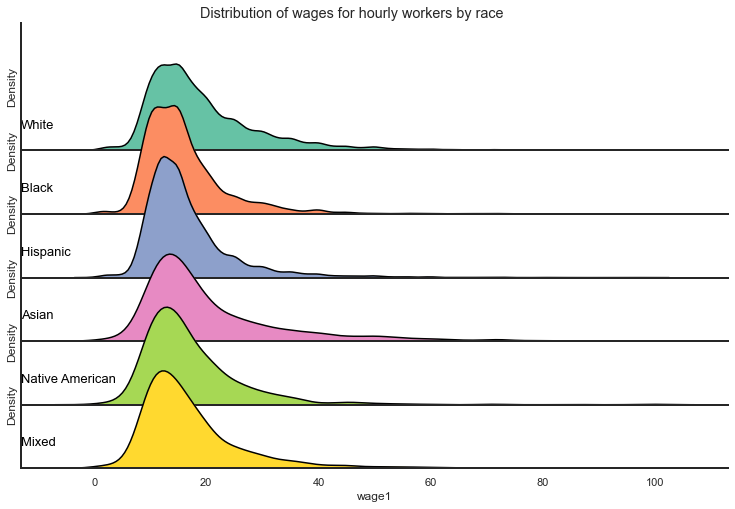

In [60]:
# Now we make the ridgeplot proper
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
    # This overrides some default Seaborn parameters. Not quite sure what they do though. 
    # https://seaborn.pydata.org/generated/seaborn.set_theme.html
palette = sns.color_palette("Set2", 6)
    # Set2 invokes the color brewer palette; the number tells Python how many colors to return. 
    # Here, I just pick the number of race-groups. (https://seaborn.pydata.org/generated/seaborn.color_palette.html)
ridges = sns.FacetGrid(df, palette=palette, row="wbhaom", hue="wbhaom", aspect=9, height=1.2)
    # here we make the grid again; "Setting this will condition the data 
    # on another variable and make multiple plots in different colors"
ridges.map_dataframe(sns.kdeplot, x="wage1", fill=True, alpha=1)
ridges.map_dataframe(sns.kdeplot, x="wage1", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
ridges.map(label, "wbhaom")
ridges.fig.subplots_adjust(hspace=-.5)
ridges.set_titles("")
ridges.set(yticks=[], xlabel="wage1")
plt.suptitle('Distribution of wages for hourly workers by race', y=0.98)